In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import SelectKBest, chi2

In [56]:
#importo i dati

df = pd.read_csv("data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [57]:
df.shape

(4250, 20)

In [58]:
# Outliers

Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
print (IQR)

account_length                   54.0000
number_vmail_messages            16.0000
total_day_minutes                72.8750
total_day_calls                  26.0000
total_day_charge                 12.3850
total_eve_minutes                67.8500
total_eve_calls                  27.0000
total_eve_charge                  5.7650
total_night_minutes              67.4750
total_night_calls                27.0000
total_night_charge                3.0375
total_intl_minutes                3.5000
total_intl_calls                  3.0000
total_intl_charge                 0.9400
number_customer_service_calls     1.0000
dtype: float64


In [62]:
#Rimozione outliers

df_out = df[~ ((df<(Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis = 1)]
df_out.shape

(3515, 20)

In [63]:
#Valori mancanti

df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [64]:
#Modifica variabili

mod = {"international_plan":     {"yes": 1, "no": 0},
                "voice_mail_plan": {"yes": 1, "no": 0}}
df = df.replace(mod)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [65]:
# Riguardo la variabile number_vmail_messages

df.groupby('number_vmail_messages').aggregate('state').count()


number_vmail_messages
0     3139
4        1
6        2
8        2
10       4
11       2
12      10
13       3
14       7
15      12
16      15
17      16
18      16
19      25
20      29
21      35
22      38
23      40
24      57
25      46
26      53
27      54
28      58
29      57
30      47
31      69
32      47
33      55
34      36
35      34
36      31
37      32
38      35
39      35
40      22
41      18
42      17
43      13
44       7
45      10
46       7
47       4
48       4
49       3
50       2
52       1
Name: state, dtype: int64

In [66]:
df['number_vmail_messages'] = pd.cut(df['number_vmail_messages'], bins=[-1,1,53], labels=['0','1'])   
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [67]:
# nuova variabile con il totale dei minuti

df['total_minutes']=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,611.5
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,527.2
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,558.2
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,501.9
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,779.3


In [68]:
# nuova variabile con il totale delle chiamate

df['total_calls']=df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,no,611.5,329
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,no,527.2,328
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,no,558.2,248
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,no,501.9,356
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,...,212.6,118,9.57,7.5,7,2.03,3,no,779.3,314


In [69]:
#nuova variabile totale addebiti

df['total_charge']=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,no,611.5,329,55.54
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,no,527.2,328,59.00
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,no,558.2,248,65.02
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,no,501.9,356,49.36
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,no,779.3,314,76.28


In [70]:
#addebito al minuto

df['charge_minute']=df['total_charge']/df['total_minutes']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,charge_minute
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,no,611.5,329,55.54,0.090826
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,no,527.2,328,59.00,0.111912
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,no,558.2,248,65.02,0.116482
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,no,501.9,356,49.36,0.098346
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,...,9.57,7.5,7,2.03,3,no,779.3,314,76.28,0.097883


In [71]:
#addebito al minuto per chiamate internazionali

df['charge_minute_intl']=df['total_intl_charge']/df['total_intl_minutes']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,charge_minute,charge_minute_intl
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,13.7,3,3.70,1,no,611.5,329,55.54,0.090826,0.270073
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,no,527.2,328,59.00,0.111912,0.269672
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,6.6,7,1.78,2,no,558.2,248,65.02,0.116482,0.269697
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,no,501.9,356,49.36,0.098346,0.270297
4,MA,121,area_code_510,0,1,1,218.2,88,37.09,348.5,...,7.5,7,2.03,3,no,779.3,314,76.28,0.097883,0.270667


<AxesSubplot:ylabel='Density'>

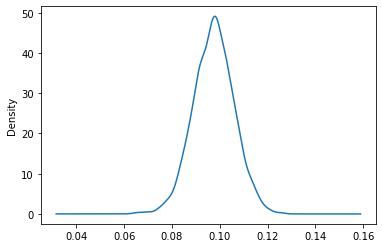

In [72]:
#guardiamo la distribuzione di charge minutes

df['charge_minute'].plot(kind = 'density')


<AxesSubplot:ylabel='Density'>

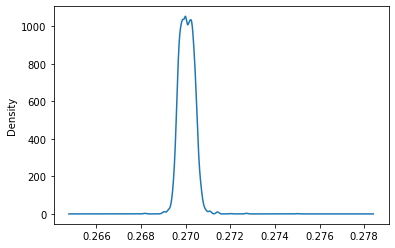

In [73]:
#guardiamo la distribuzione di charge_minutes_intl

df['charge_minute_intl'].plot(kind = 'density')


In [74]:
X=df.iloc[:,[3,4,5,6,14,19,20]]
y=df.iloc[:,15]

In [75]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)



In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=5)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\Unieuro\anaconda3\lib\site-packages\sklearn

ValueError: could not convert string to float: 'no'